In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

plt.style.use('seaborn-muted')


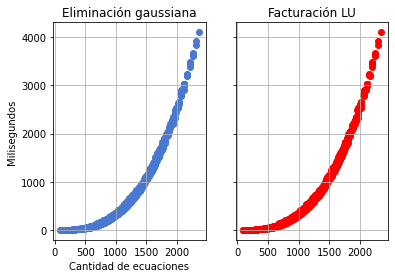

In [57]:
data = []

with open('./testEGvsLU/results_20220411_001242.json') as json_file:
    results = json.load(json_file)

    for result in results:
        n = int(result['n'])
        m = int(result['m'])

        eg_times = [ int(t) for t in result['EG'] ]        
        eg_mean = np.mean(eg_times) / 1000000

        lu_times = [ int(t) for t in result['LU'] ]
        lu_mean = np.mean(eg_times) / 1000000

        data.append({
            'size': n*(m-1),
            'n': n,
            'm': m,
            'eg_mean': eg_mean,
            'lu_mean': lu_mean
        })

df = pd.DataFrame(data)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df['size'], df['eg_mean'])
ax1.set_title('Eliminación gaussiana')
ax1.set_ylabel('Milisegundos')
ax1.set_xlabel('Cantidad de ecuaciones')
ax1.grid(visible=True)

ax2.scatter(df['size'], df['lu_mean'], c='r')
ax2.set_title('Facturación LU')
ax2.grid(visible=True)





